In [10]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from scipy import sparse
from pyfm import pylibfm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def unison_shuffled_copies(a, b):
    assert a.shape[0] == len(b)
    p = np.random.permutation(a.shape[0])
    return a[p], b[p]

X = sparse.load_npz("ml_latest_small_formated_with_genres.npz")
filename="ml-latest-small/ratings.csv"
data=np.genfromtxt(filename,skip_header=1,delimiter=",")
y = data[:,-2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Training size: %d, Validation size: %d, Test size: %d" % (X_train.shape[0],X_val.shape[0],X_test.shape[0]))



num_factor=8
learning_rate=0.001
nr_epochs=100

fm = pylibfm.FM(num_cols=np.max(X_train.indices) + 1, num_factor=num_factor, task="regression", learning_rate=learning_rate)
train_error=[]
val_error=[]
for i in range(nr_epochs):
    fm.learn(X_train, y_train)
    preds_train = fm.predict(X_train)
    preds_test = fm.predict(X_test)
    train_error_tmp = mean_squared_error(y_train, preds_train)
    val_error_tmp = mean_squared_error(y_test, preds_test)
    train_error.append(train_error_tmp)
    val_error.append(val_error_tmp)
    print("Train FM MSE: %.4f Validation FM MSE: %.4f" % (train_error_tmp, val_error_tmp))

Training size: 60501, Validation size: 20167, Test size: 20168
Train FM MSE: 0.9406 Validation FM MSE: 0.9628
Train FM MSE: 0.8865 Validation FM MSE: 0.9156


KeyboardInterrupt: 

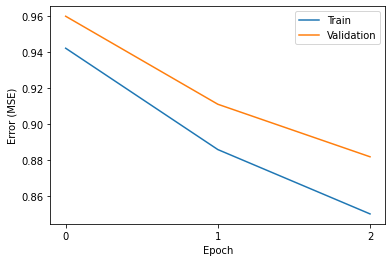

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(train_error,label="Train")
plt.plot(val_error,label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Error (MSE)")
plt.legend()
plt.savefig("train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)+".pdf")
plt.show()